# Análise de Dados com Métodos de Aprendizado de Máquina

## Introdução ao Aprendizado de Máquina

### Daniel Rocha da Silva, Laura Kubitschek Fiorindo

Descrição do trabalho: [Descrição.pdf](https://github.com/danielrochas/ML_Trabalho_1/blob/main/Descrição.pdf)

### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

### Problema 1

### Problema 2

### Problema 3

Importação e visualização do banco de dados

In [2]:
college_data = pd.read_csv("data/College.csv")
college_data

,Inst.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Foi feita a troca da variável *Top10perc* pela variável *Elite*, sendo esta uma variável que assume o valor 0 para valores da variável *Top10perc* no intervalo (-1, 50] e 1 para valores no intervalo (50, 101].

In [3]:
college_data["Elite"] = pd.cut(college_data["Top10perc"], bins = (-1,50,101), labels = False)
college_data = college_data.drop(columns = {"Top10perc"})

Foi feita a troca da variável Private para valores inteiros (Yes = 1; No = 0).

In [4]:
college_data["Private"] = np.where(college_data["Private"] == 'Yes', 1, 0)

Visualização da variável resposta

Text(0.5, 0.98, 'Distribuição dos dados da variável resposta (Elite)')

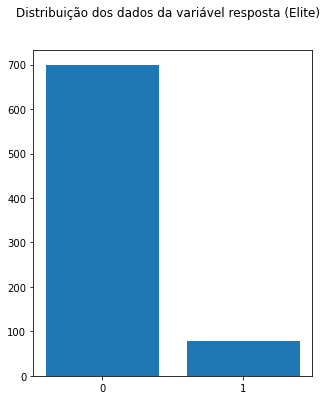

In [5]:
%matplotlib inline


unique, counts = np.unique(college_data["Elite"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (Elite)')

Com o gráfico acima podemos perceber como a variável resposta apresenta classes (0, 1) com frequência nos dados desbalanceada. Isso deve ser observado nos modelos feitos a seguir.

Separação entre *features* e *target*

In [6]:
features_college = college_data.drop(columns = {"Inst.Name", "Elite"})
target_college = college_data["Elite"]

Foi feita a padronização das *features*

In [7]:
scaler = StandardScaler()
features_college_scaled = scaler.fit_transform(features_college)

Aplicamos o método K-vizinhos

In [8]:
neigh_college = KNeighborsClassifier(n_neighbors=5)
neigh_college.fit(features_college_scaled, target_college);

# Validação cruzada com método 10-fold
print("Dados normalizados:")
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

print("\n")
print("Dados originais:")
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Dados normalizados:
Acurácia:  [0.93589744 0.96153846 0.97435897 0.94871795 0.94871795 0.93589744
 0.91025641 0.8961039  0.97402597 0.93506494] Média:  0.942057942057942
Recall:  [0.75       0.625      0.75       0.5        0.5        0.5
 0.125      0.14285714 0.71428571 0.625     ] Média:  0.5232142857142856
Precison:  [0.66666667 1.         1.         1.         1.         0.8
 1.         0.33333333 1.         0.71428571] Média:  0.8514285714285714
f1:  [0.70588235 0.76923077 0.85714286 0.66666667 0.66666667 0.61538462
 0.22222222 0.2        0.83333333 0.66666667] Média:  0.6203196150254974


Dados originais:
Acurácia:  [0.91025641 0.93589744 0.96153846 0.93589744 0.94871795 0.92307692
 0.8974359  0.90909091 0.92207792 0.94805195] Média:  0.9292041292041292
Recall:  [0.5        0.375      0.625      0.5        0.5        0.375
 0.125      0.14285714 0.57142857 0.625     ] Média:  0.43392857142857144
Precison:  [0.57142857 1.         1.         0.8        1.         0.75
 0.5        

Como podemos ver com os resultados acima conseguimos resultados melhores com a normalização das *features*. 

Podemos perceber também que a medida de acurácia pode ser enganosa já que, neste caso, temos classes bem desbalanceadas. Por isso as medidas *recall*, *precision* e *f1* são mais interessantes para a situação.

Aplicamos Naive Bayes

In [9]:
gaussian_nb_college = GaussianNB()
gaussian_nb_college.fit(features_college_scaled, target_college);

# Validação cruzada com método 10-fold
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Acurácia:  [0.92307692 0.97435897 0.94871795 0.91025641 0.97435897 0.94871795
 0.93589744 0.88311688 0.94805195 0.90909091] Média:  0.9355644355644355
Recall:  [0.875      1.         0.875      0.75       0.75       1.
 0.625      0.42857143 0.85714286 1.        ] Média:  0.8160714285714284
Precison:  [0.58333333 0.8        0.7        0.54545455 1.         0.66666667
 0.71428571 0.375      0.66666667 0.53333333] Média:  0.658474025974026
f1:  [0.7        0.88888889 0.77777778 0.63157895 0.85714286 0.8
 0.66666667 0.4        0.75       0.69565217] Média:  0.7167707311757655


Com o *Naive Bayes Gaussiano* não precisamos normalizar as *features*.

Podemos perceber com as métricas apresentadas acima que os resultados obtidos com o método de *Naive Bayes* foram melhores pela métrica *recall*. Esta métrica representa a proporção de classifições 1 feitas pelo modelo dentre todas as verdadeiras classificações 1 nos dados, essa medida, em geral é muito importante e um incremento nela é algo significativo. Já na métrica *precision* tivemos uma piora em relação ao modelo k-vizinhos. Esta métrica representa a proporção de classificações 1 feitas pelo modelo que realmente são classificações 1 nos dados.

### Problema 4

In [10]:
boston_data = pd.read_csv("data/Boston.csv", sep = ";", decimal = ",")
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Visualização da variável resposta

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

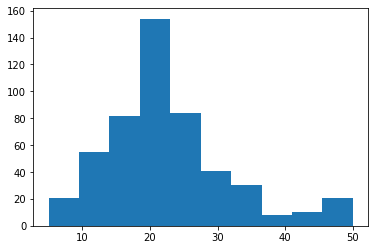

In [11]:
%matplotlib inline

plt.hist(boston_data["medv"])

Com o gráfico acima podemos perceber como a variável resposta apresenta um comportamento semelhante a uma distribuição normal. Ela apresenta um intervalo central mais frequente e tem a frequência reduzida nas caudas.

Separação entre features e target

In [12]:
features_boston = boston_data.drop(columns = {"medv"})
target_boston = boston_data["medv"]

Foi feita a padronização das features

In [13]:
scaler = StandardScaler()
features_boston_scaled = scaler.fit_transform(features_boston)

Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [14]:
features_boston_train, features_boston_test, target_boston_train, target_boston_test = \
    train_test_split(features_boston_scaled, target_boston, test_size = 0.2, random_state = 42)

Aplicamos o método de Regressão Linear e calculamos uma medida de validação no conjunto de teste

In [15]:
lr_boston = LinearRegression()
lr_boston.fit(features_boston_train, target_boston_train);

# Validação
print("R^2: ", lr_boston.score(features_boston_test, target_boston_test))

print("\n")

print("Intercepto", lr_boston.intercept_)
for i in range(len(lr_boston.coef_)):
    print(boston_data.columns[i], lr_boston.coef_[i])

R^2:  0.6687594935356322


Intercepto 22.485268239316902
crim -0.9714942298153109
zn 0.7015556186825168
indus 0.27675211756097745
chas 0.7065315219738251
nox -1.9914304346295502
rm 3.115718363958981
age -0.17706020680903325
dis -3.045770645410489
rad 2.282784712788725
tax -1.792604675752152
ptratio -1.9799535094590697
black 1.126498635557213
lstat -3.628149374371363


Podemos perceber pelos coeficientes apresentados acima que as *features* *crim*, *nox*, *age*, *dis*, *tax*, *ptratio* e *lstat* fornecem uma contribuição negativa para o *target*. Dentre essas *features* podemos destacar *dis* e *lstat* como aquelas que mais influenciam negativamente no preço e este comportamento é aquele esperado para elas.

As *features* *zn*, *indus*, *chas*, *rm*, *rad* e *black* fornecem uma contribuição positiva para o *target*. Dentre essas *features* podemos destacar *rm* como aquela que mais influencia positivamente no preço e este comportamento é aquele esperado para ela, já que esta representa a quantidade de quartos média das residências daquele local.